# Supervised Learning: Decision Trees

For methods like support vector machines to work well, it requires identifying an appropriate kernel function, which is not always straightforward or intuitive.

An alternative to this is to perform statistical learning more directly, say, as a combination of the predictors (features). An **adaptive basis-function model** (ABM) is one example of this.

$$f(x) = w_0 + \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$

here, $\phi_j$ is a *basis function*, which is typically parametric:

$$\phi_j(\mathbf{x}) = \phi_j(\mathbf{x}|\alpha_j)$$

The parameter set for this model is thus $\theta = \{\mathbf{w} = w_0,\ldots,w_k; \mathbf{\alpha} = \alpha_1, \ldots, \alpha_k\}$. This model is *not* linear in the parameters.


**Decision trees** use an ABM to *recursively partition* the space of predictor variables into a piecewise-constant response surface. We can consider each component $j=1,\ldots,k$ to be a region in the response surface, and $w_j$ the expected response in that region.

$$f(x) = \sum_{j=1}^k w_j I(\mathbf{x} \in R_j)$$

Each paramter $\alpha_j$ encodes both (1) a variable used for splitting and (2) the corresponding threshold value. Specifically, the basis functions define the regions, and the weights encode the response value in each region.

This particular formulation implies a regression-type model, but we can generalize this to classification by storing the *distribution over classes* in each leaf, instead of the mean response.

To get a sense of how decision trees work, consider the diabetes dataset that we have seen previously. In the plot below, the response variable (`target`, an index of disease progression) is color-coded as a function of two variables, metabolic rate (`bmi`) and a blood serum measurement (`ltg`).

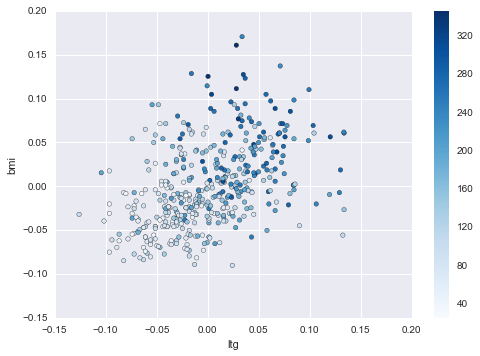

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.datasets import load_diabetes

# Predictors: "age" "sex" "bmi" "map" "tc"  "ldl" "hdl" "tch" "ltg" "glu"
diabetes = load_diabetes()
y = diabetes['target']
bmi, ltg = diabetes['data'][:,[2,8]].T

plt.scatter(ltg, bmi,  c=y, cmap="Blues")
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

In [2]:
diabetes.keys()

dict_keys(['data', 'target'])

One approach to building a predictive model is to subdivide the variable space into regions, by sequentially subdividing each variable. For example, if we split `ltg` at a threshold value of -0.01, it does a reasonable job of isolating the large values in one of the resulting subspaces.

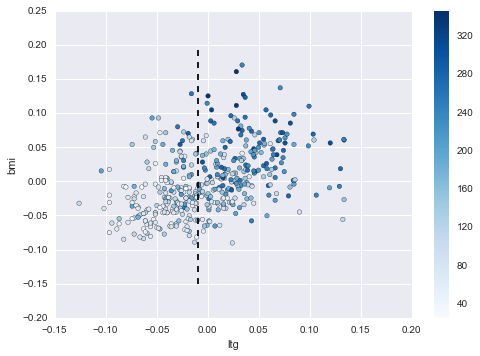

In [3]:
ltg_split = -0.01
plt.scatter(ltg, bmi,  c=y, cmap="Blues")
plt.vlines(ltg_split, *plt.gca().get_ylim(), linestyles='dashed')
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

However, that region still contains a fair number of low (blue) values, so we can similarly bisect the region using a `bmi` value of -0.03 as a threshold value:

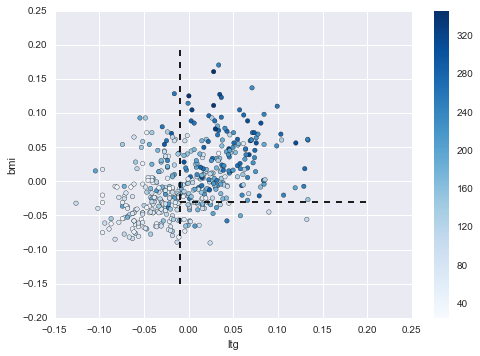

In [4]:
bmi_split = -0.03
plt.scatter(ltg, bmi,  c=y, cmap="Blues")
plt.vlines(ltg_split, *plt.gca().get_ylim(), linestyles='dashed')
plt.hlines(bmi_split, ltg_split, plt.gca().get_xlim()[1], linestyles='dashed')
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

We can use this partition to create a piecewise-constant function, which returns the average value of the observations in each region defined by the threshold values. We could then use this rudimentary function as a predictive model.

In [5]:
np.mean(y[(bmi>bmi_split) & (ltg>ltg_split)])

197.69417475728156

In [6]:
np.mean(y[(bmi<=bmi_split) & (ltg>ltg_split)])

136.93939393939394

In [7]:
np.mean(y[ltg<ltg_split])

108.36945812807882

The choices for splitting the variables here were relatively arbitrary. Better choices can be made using a cost function $C$, such as **residual sums of squares** (RSS).

$$C = \sum_j \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2$$

where $\hat{y}_{R_j}$ is the mean response for the training observations in the jth region.

### Exercise

Use residual sums of squares to select competitive threshold values for the predictive model defined above

In [8]:
grid = np.linspace(ltg.min(),ltg.max(),100)

In [9]:
grid = np.linspace(ltg.min() + 1e-9,ltg.max() -1e-9,100)

In [10]:
def split_ssr(y, feature, split):
    C = np.sum(y - np.mean(y[(feature>split)]))**2
    return(C)

In [11]:
def split_ssr(y, feature, thresh):
    y_sub1 = y[feature < thresh]
    ssr = np.sum((y_sub1-y_sub1.mean()) ** 2)
    y_sub2 = y[feature >= thresh]
    ssr += np.sum((y_sub2-y_sub2.mean()) ** 2)
    return(ssr)

In [12]:
split_ssr(y,bmi,0.01)

1907054.1481399615

In [13]:
np.argmin([split_ssr(y,ltg,x) for x in grid])

48

In [14]:
grid[48]

-0.00018399616117653617

In [15]:
sum(ltg < grid[48])

230

In [16]:
ltg.shape

(442,)

so we have a split pretty much in the centre

## my sol

In [17]:
for x in grid:
    split_ssr(y,bmi,x)
    

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [18]:
# Write your answer here
bmi_split = 0.01
(y - np.mean(y[(bmi>bmi_split)]))**2

array([  2.94087269e+03,   1.69598044e+04,   4.12546896e+03,
         5.93186991e-01,   4.93222673e+03,   1.17136926e+04,
         4.51984785e+03,   2.02293199e+04,   9.06871741e+03,
         1.09767919e+04,   1.08638541e+04,   1.85585621e+04,
         6.88003125e+02,   4.09245361e+02,   7.60904039e+03,
         1.17168014e+03,   1.53897828e+03,   3.74909008e+03,
         1.17136926e+04,   1.38605903e+03,   1.88320218e+04,
         2.44077547e+04,   1.88320218e+04,   1.58166772e+03,
         4.50704988e+02,   1.04316963e+01,   4.65530747e+03,
         1.44552081e+04,   5.51006524e+03,   6.04820188e+03,
         5.81098449e+03,   2.13831584e+04,   1.84335435e+04,
         1.39782888e+04,   1.96644006e+04,   1.06563944e+04,
         3.57247517e+03,   5.00841927e+03,   2.18745033e+03,
         1.32779100e+04,   1.10733137e+04,   2.25689969e+04,
         2.08022391e+04,   1.28209907e+04,   2.89123294e+03,
         2.31739162e+04,   2.31947224e+02,   3.99800934e+03,
         1.69598044e+04,

The recursive partitioning demonstrated above results in a **decision tree**. The regions defined by the trees are called *terminal nodes*. Locations at which a predictor is split, such as `bmi`=-0.03, are called  *internal nodes*. As with this simple example, splits are not generally symmetric, in the sense that splits do not occur similarly on all branches.

Now consider a subset of three variables from the Titanic dataset, which we would like to use to predict survival from the disaster. The following describes one such decision tree:

- We first check if gender of the passenger is male. If "no", we follow the right branch and end up in a leaf where the probability of survival is $p(y=1,x_1=F)=0.73$, so we predict survival ($y=1$) at this node (36% of observations fall under this leaf)
- If the passenger is male, we then check the age of the passenger. If he is older than 9.5 years, then the probability of survival $p(y=1,x_1=M,x_2>9.5)=0.17$, so we predict death ($y=0$). 
- If, on the other hand, the passenger is younger than 9.5 years, we then check if the number of siblings and spouses on board was higher than 2.5; if "yes", then the probability of survival  $p(y=1, x_1=M, x_2>9.5, x_3>2.5)=0.05$, so we predict death, otherwise we predict survival with $p(y=1, x_1=M, x_2>9.5 , x_3 \lt 2.5)=0.89$. 

Hence, these probabilities are just the empirical fraction of positive examples that satisfy each conjunction of feature values, which defines a path from the root to a leaf.

![titanic tree](http://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

There is no way to feasibly evaluate all possible partitions. Instead, the strategy is to use a top-down, **greedy** approach that is optimal (according to a particular cost function) for the current split only. By "greedy", we mean that at each step it chooses the most advantageous binary partition, not taking into account the impact of the choice on the quality of subsequent partitions.

$$(j^*, t^*) = \text{argmin}_{j,t} C(\{\mathbf{x}_i,y_i: x_{ij} \le t\}) + C(\{\mathbf{x}_i,y_i: x_{ij} \gt t\})$$

where $C$ is a cost function, $j$ and $t$ are a variable index and cutpoint, respectively. We will restrict consideration to **binary partitions**.

## Classification Trees

In addition to regression trees, we can also use decision trees on categorical outcomes, and these are called classification trees. The primary difference in implementation is that residual sums of squares is no longer an appropriate splitting criterion.

NOTE: there is a method called CHAID not in skleanr

### Entropy

An alternative splitting criterion for decision tree learning algorithms is *information gain*. It measures how well a particular attribute distinguishes among different target classifications. Information gain is measured in terms of the expected reduction in the entropy or impurity of the data. The entropy of a set of probabilities is:

$$H(p) = -\sum_i p_i log_2(p_i)$$

If we have a set of binary responses from some variable, all of which are positive/true/1, then knowing the values of the variable does not hold any predictive value for us, since all the outcomes are positive. Hence, the entropy is zero:

In [19]:
import numpy as np
from scipy.stats import entropy

# entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0

In [20]:
entropy([.4,.6], base=2)

0.9709505944546688

However, if the variable splits responses into equal numbers of positive and negative values, then entropy is maximized, and we wish to know about the feature:

In [21]:
entropy([0.5, 0.5], base=2)

1.0

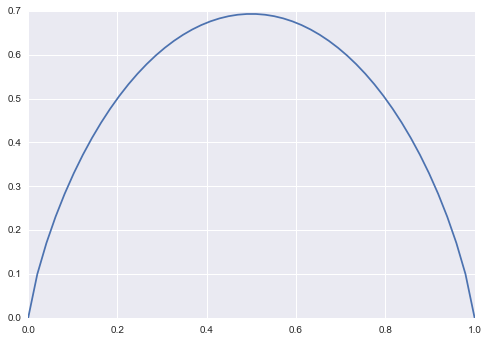

In [22]:
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p]) for p in pvals])

The entropy calculation tells us how much additional information we would obtain with knowledge of the variable.

So, if we have a set of candidate covariates from which to choose as a node in a decision tree, we should choose the one that gives us the most information about the response variable (*i.e.* the one with the highest entropy).

### Misclassification Rate

Alternatively, we can use the misclassification rate:

$$C(j,t) = \frac{1}{n_{jt}} \sum_{y_i: x_{ij} \gt t} I(y_i \ne \hat{y})$$

where $\hat{y}$ is the most probable class label and $n_{ij}$ is the number of observations in the data subset obtained from splitting via $j,t$.

### Gini index

The Gini index is simply the expected error rate:

$$C(j,t) = \sum_{k=1}^K \hat{\pi}_{jt}[k] (1 - \hat{\pi}_{jt}[k]) = 1 - \sum_{k=1}^K \hat{\pi}_{jt}[k]^2$$

where $\hat{\pi}_{jt}[k]$ is the probability of an observation being correctly classified as class $k$ for the data subset obtained from splitting via $j,t$ (hence, $(1 - \hat{\pi}_{jt}[k])$ is the misclassification probability).

NOTE: SKIPPER only ever used default, very little difference between.

In [23]:
gini = lambda p: 1. - (np.array(p)**2).sum()

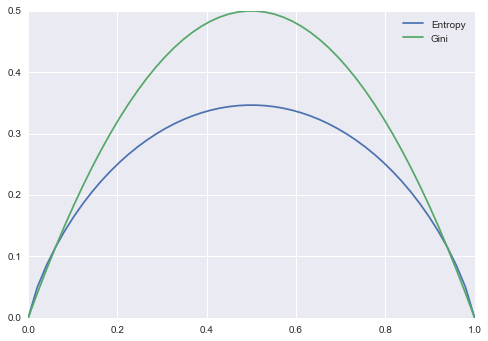

In [24]:
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p])/2. for p in pvals], label='Entropy')
plt.plot(pvals, [gini([p,1-p]) for p in pvals], label='Gini')
plt.legend()

## ID3

A given cost function can be used to construct a decision tree via one of several algorithms. The Iterative Dichotomiser 3 (ID3) is on such algorithm, which uses entropy, and a related concept, *information gain*, to choose features and partitions at each classification step in the tree.

Information gain is the difference between the current entropy of a system and the entropy measured after a feature is chosen. If $S$ is a set of examples and $X$ is a possible feature on which to partition the examples, then:

$$G(S,X) = \text{Entropy}(S) - \sum_{x \in X} \frac{\#(S_x)}{\#(S)} \text{Entropy}(S_x)$$

where $\#$ is the count function and $x$ is a particular value of $X$.

Let's say $S$ is a set of survival events, $S = \{s_1=survived, s_2=died, s_3=died, s_4=died\}$ and a particular variable $X$ can have values $\{x_1, x_2, x_3\}$. To perform a sample calculation of information gain, we will say that:

* $X(s_1) = x_2$
* $X(s_2) = x_2$
* $X(s_3) = x_3$
* $X(s_4) = x_1$

The current entropy of this state is:

$$\begin{align}
\text{Entropy}(S) &= -p^{(+)} \log_2(p^{(+)}) - p^{(-)} \log_2(p^{(-)}) \\
&= -0.25 \log_2(0.25) - 0.75 \log_2(0.75) \\
&= 0.5 + 0.311 = 0.811
\end{align}$$

Now, we need to compute the information after selecting variable $X$, which is the sum of three terms:

$$\begin{align}
\frac{\#(S_{x1})}{\#(S)} \text{Entropy}(S) &= 0.25 (-0 \log_2(0) - 1 \log_2(1)) = 0\\
\frac{\#(S_{x2})}{\#(S)} \text{Entropy}(S) &= 0.5 (-0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 0.5\\
\frac{\#(S_{x3})}{\#(S)} \text{Entropy}(S) &= 0.25 (-0 \log_2(0) - 1 \log_2 1) = 0\\
\end{align}$$

Therefore, the information gain is:

$$G(S,X) = 0.811 - (0 + 0.5 + 0) = 0.311$$

This algorithm is implemented in the following function:

In [25]:
import numpy as np

def info_gain(X, y, feature):
    # Calculates the information gain based on entropy
    
    gain = 0
    n = len(X)

    # List the values that feature can take
    values = list(set(X[feature]))

    feature_counts = np.zeros(len(values))
    E = np.zeros(len(values))
    ivalue = 0
    
    # Find where those values appear in X[feature] and the corresponding class
    for value in values:
        
        new_y = [y[i] for i,d in enumerate(X[feature].values) if d==value]
        feature_counts[ivalue] += len(new_y)

        # Get the values in newClasses
        class_values = list(set(new_y))

        class_counts = np.zeros(len(class_values))
        iclass = 0
        for v in class_values:
            for c in new_y:
                if c == v:
                    class_counts[iclass] += 1 
            iclass += 1
        
        nc = float(np.sum(class_counts))
        new_entropy = entropy([class_counts[c] / nc for c in range(len(class_values))])
        E[ivalue] += new_entropy

        # Computes both the Gini gain and the entropy
        gain += float(feature_counts[ivalue])/n * E[ivalue]
        ivalue += 1
        
    return gain 

Consider a few variables from the titanic database:

In [26]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Here, we have selected pasenger class (`pclass`), sex, port of embarcation (`embarked`), and a derived variable called `adult`. We can calculate the information gain for each of these.

In [27]:
X = titanic.copy()
y = X.pop('survived')
X['adult'] = titanic.age < 17

info_gain(X, y, 'pclass')

0.61621807299550901

In [28]:
info_gain(X, y, 'sex')

0.52257564958301128

In [29]:
info_gain(X, y, 'embarked')

0.64705755108044338

In [30]:
info_gain(X, y, 'adult')

0.65823140460450202

Hence, the ID3 algorithm computes the information gain for each variable, selecting the one with the highest value (in this case, `adult`). In this way, it searches the "tree space" according to a greedy strategy.

A tree can be constructed by recursively selecting the feature from the current dataset with the largest information gain, then removing it from the datset. Recursion stops when there are either no variables remaining, or there is only one class left in the subset (*e.g.* all `True` or all `False`).

The ID3 algorithm is as follows:

> * if all response data have the same class:
> 
>     - return leaf with data label
>     
> * else if no features:
> 
>     - return leaf with most common label
>     
> * else:
> 
>     - choose variable $X'$ that maximizes information gain to be a tree node
>     - add branch from node for each value of $X'$
>     - for each branch of node:
>     
>         * calculate $S_{x}$ by removing $X'$ from $S$
>         * set $S=S_{x}$ and call algorithm again 

The greedy approach of maximizing information gain at each step tends to bias solutions towards smaller trees.

## Decision Trees in `scikit-learn`

Classification trees, either binary or multi-class, are implemented in `scikit-learn` in the `DecisionTreeClassifier` class. Where trees are binary, it expects the response variable to be coded as `[-1,1]` for negative and positive outcomes.

Let's build a decision tree on the wine dataset.

In [31]:
wine = pd.read_table("../data/textbook/wine.dat", sep='\s+')

attributes = [
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]

grape = wine.pop('region')
y = grape
wine.columns = attributes
X = wine

In [32]:
from sklearn import tree
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.4, random_state=0)

ImportError: cannot import name 'model_selection'

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_features="auto",
                                  min_samples_leaf=10)
clf.fit(X_train, y_train)

If you have [GraphViz](http://www.graphviz.org) installed, you can draw the resulting tree:

In [ ]:
with open("wine.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [ ]:
! dot -Tpng wine.dot -o wine.png

In [ ]:
for i,x in enumerate(X.columns):
    print(i,x)

In order to render graphs as images, you will need to install the `pydot` package:

In [ ]:
!pip install pydot2

In [ ]:
from IPython.core.display import Image
Image("wine.png")

NOTE: this makes a plot of decision tree, looks great if can get to work

In [ ]:
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

In [ ]:
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

### Pruning

Despite the **inductive bias** associated with trees that tend to make them small, the ID3 algorithm continues choosing nodes and branches until either it runs out of variables, or all outputs are of the same class. This can clearly lead to overfit trees.

To prevent overfitting, we can **stop growing** the tree if the information gain (or reduction in error, etc.) is not sufficient to justify the extra complexity of adding another node. However, this simple rule is not optimal, because an uninformative subtree can lead to informative ones later on. 

The standard approach is therefore to grow a full tree, and then to **prune** it. The easiest approach is to remove branches that give the least increase in the error (information gain). To determine how far back to prune, we can evaluate the cross-validated error on each candidate pruning, and then pick the tree whose CV error is within 1 standard error of the minimum.
|
Analogous to the lasso or ridge regression, we can **penalize** the number of terminal nodes in a tree:

$$\sum_{m=1}^{|T|} \sum_{x_i \in R_m} (y_i - \hat{y}_{R_j})^2 + \alpha |T|$$

where $|T|$ is the number of terminal nodes in tree T.

### Pruned Decision Tree Algorithm

1. Use recursive binary splitting to grow a large tree, such that each terminal node has fewer than some minimum number of observations.
2. Apply pruning to obtain a sequence of best subtrees, as a function of $\alpha$.
3. Use k-fold cross-validation to choose $\alpha$. Average results and pick $\alpha$ to minimize the average error.
4. Return subtree from (2) that corresponds to chosen $\alpha$.


##  Averaging Trees

Decision trees have several advantages: 

* ease of interpretation
* easy of implementation
* handles continuous and discrete features (and mixed)
* invariant to monotone transformation of features
* variable selection automated (ignores redundant variables)
* robust
* scalable (can handle huge datasets)

However, relative to other statistical learning methods, trees do not predict very accurately, due to the greedy nature of the tree construction algorithm. Also, trees tend to be **unstable**, as small changes to the inputs can have large effects on the structure of the tree; poor decisions near the root of the tree will propogate to the rest of the tree. Hence, trees are **high variance** (*i.e.* noisy) estimators.

One way to reduce the variance of an estimate is to average together many estimates. In the case of decision trees, we can train $T$ different trees on random subsets of the data (with replacement) then average according to:

$$\hat{f}(\mathbf{x}) = \frac{1}{T} \sum_{i=1}^T f_t(\mathbf{x})$$

where $f_t$ is the $t^{th}$ tree. This approach is called "bootstrap aggregating", or **bagging**.

Note that, since we are averaging over trees, there is *no need to prune*. With bagging, we reduce variance by averaging, rather than by pruning.

In [ ]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(n_jobs=4, n_estimators=20, oob_score=True)
bc

THis can be used for all types of calssifier (use base estimator var to choose, decision tree is default)

In [ ]:
bc.fit(X_train, y_train)

preds = bc.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

Test error of a bagged model is measured by estimating **out-of-bag error**.

On average, each bagged tree uses about 2/3 of observations, leaving the remaining third as "out-of bag". The response for the ith observation for each of the trees in which that observation was excluded (on average, B/3) is averaged. This essentially the same as performing leave-one-out (LOO) cross-validation.

In [ ]:
bc.oob_score_

This approach is an **ensemble learning** method, because it takes a set of *weak* learners, and combines them to construct a *strong* learner that is more robust, with lower generalization error.

An average of B trees, each with variance $\sigma^2$, has variance $\sigma^2/B$. If the variables are simply identically distributed, with positive pairwise correlation $\rho$, then the variance of the average of the B trees is:

$$\rho \sigma^2 + \frac{1-\rho}{B}\sigma^2$$

As the number of trees becomes large, the second term goes to zero. Further reductions in variance are limited by the size of the **correlation** among the trees $\rho$.

NOTE: reach for a random forest whenever you want a model without much tuning

## Random Forests

**Random forests** improves upon bagging by creating a set of decision trees that are less correlated than bootstrapped trees. This is done by selecting from only a subset $m$ out of $M$ possible predictors at each split. Typically, we choose approximately the square root of the available number.

This procedure is used to create a set of trees, most of which will be poor at predicting a given observation. However, classification is based on a *majority vote* of the constituent trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

With random forests, it is possible to quantify the **relative importance** of feature inputs for classification. In scikit-learn, the Gini index (recall, a measure of error reduction) is calculated for each internal node that splits on a particular feature of a given tree, which is multiplied by the number of samples that were routed to the node (this approximates the probability of reaching that node). For each variable, this quantity is averaged over the trees in the forest to yield a measure of importance.

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

NOTE: proportion of entropy gain in brackets. Gives some of an idea of the parameters that are most important. These are rnadom, so they change. You cna also end up with differnt importances. The data set is quite small so we expect to move around more n=72.

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]]);

`RandomForestClassifier` uses the Gini impurity index by default; one may instead use the entropy information gain as a criterion.

In [ ]:
rf = RandomForestClassifier(n_jobs=4, criterion='entropy')
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

## Exercise: Classifying Income

Using the US Census, predict whether someone has income over 50k.

You'll need to pre-process the data. Create dummy variables (unfortunately). Binarize the target.

Fit a `DecisionTreeClassifier` and a `RandomForestClassifier` to the data. There is a holdout set that you can test the performance of your classifier on using `sklearn.metrics.accuracy_score`.

In [33]:
with open("../data/adult.names") as fin:
    notes = fin.read()
    
print(notes)







<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://assets-cdn.github.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" href="https://assets-cdn.github.com/assets/frameworks-4ba00b1aa0227e4b7a7961544c3b7938afb2720757a471735991ec4475c829e0.css" integrity="sha256-S6ALGqAifkt6eWFUTDt5OK+ycgdXpHFzWZHsRHXIKeA=" media="all" rel="stylesheet" />
  <link crossorigin="anonymous" href="https://assets-cdn.github.com/assets/github-7dc531f66337b1ed9f13f1047d562c9133ba761ce7d9e840a7e5f200432c44ea.css" integr

In [34]:
import pandas as pd

In [35]:
dta = pd.read_csv("../data/adult.data.cleaned.csv.gz", compression="gzip")
test = pd.read_csv("../data/adult.test.cleaned.csv.gz", compression="gzip")

#dta = pd.read_csv("../data/")

In [36]:
del dta['fnlwgt']
del dta['education_num']
del test['fnlwgt']
del test['education_num']

In [37]:
dta.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
dta.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [39]:
dta.dtypes

age                int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [40]:
from sklearn.preprocessing import (OneHotEncoder, 
                                   LabelBinarizer, 
                                   LabelEncoder)

In [41]:
binar = LabelBinarizer()
dta['income'] = binar.fit_transform(dta['income'])
test['income'] = binar.fit_transform(test['income'])

In [42]:
y_train = dta.pop('income')

In [43]:
y_test = test.pop('income')

In [44]:
feature_transform = {}

for column in dta.select_dtypes(["object"]):
    enc = LabelEncoder()
    feature_transform.update({
        column: enc.fit(dta[column])
    })
    #### assing new labels to 
    dta[column] = feature_transform[column].transform(dta[column])
    test[column] = feature_transform[column].transform(test[column])

In [45]:
binar = LabelBinarizer()
test[column] = binar.fit_transform(test[column])

In [13]:
feature_transform

{'education': LabelEncoder(),
 'marital_status': LabelEncoder(),
 'native_country': LabelEncoder(),
 'occupation': LabelEncoder(),
 'race': LabelEncoder(),
 'relationship': LabelEncoder(),
 'sex': LabelEncoder(),
 'workclass': LabelEncoder()}

In [14]:
dta.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,9,4,1,1,4,1,2174,0,40,39
1,50,6,9,2,4,0,4,1,0,0,13,39
2,38,4,11,0,6,1,4,1,0,0,40,39
3,53,4,1,2,6,0,2,1,0,0,40,39
4,28,4,9,2,10,5,2,0,0,0,40,5


In [15]:
test.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,4,1,4,7,3,2,1,0,0,40,0
1,38,4,11,2,5,0,4,1,0,0,50,0
2,28,2,7,2,11,0,4,1,0,0,40,0
3,44,4,15,2,7,0,2,1,7688,0,40,0
4,18,0,15,4,0,3,4,0,0,0,30,0


In [16]:
#### standardise names for fits
x_train = dta
x_test = test

#### fit tree

In [66]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_features="auto",
                                  min_samples_leaf=5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [67]:
pred = clf.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test,pred)
#### should accuravy be changing??

0.83115287758737177

In [21]:
pd.crosstab(y_test,pred,rownames=['actual'],colnames=['prediction'])

prediction,0,1
actual,,
0,11667,768
1,1806,2040


#### fit RF

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=20,min_samples_leaf=20)
rf.fit(x_train, y_train)

pred = rf.predict(x_test)

accuracy_score(y_test,pred)

0.85664271236410539

In [31]:
pd.crosstab(y_test, pred, rownames=['actual'], 
            colnames=['prediction'])

prediction,0,1
actual,,
0,11573,862
1,1668,2178


In [32]:
import numpy as np

In [33]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, x_test.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. age (0.228809)
2. capital_gain (0.136796)
3. relationship (0.114737)
4. hours_per_week (0.103730)
5. education (0.102914)
6. occupation (0.092618)
7. marital_status (0.074408)
8. workclass (0.053854)
9. capital_loss (0.047144)
10. native_country (0.021260)
11. race (0.017499)
12. sex (0.006230)


## References

Meinshausen, N. [Quantile Regression Forests](http://www.jmlr.org/papers/volume7/meinshausen06a/meinshausen06a.pdf) Journal of Machine Learning Research 7 (2006) 983–999

T. Hastie, R. Tibshirani and J. Friedman. (2009) [Elements of Statistical Learning: Data Mining, Inference, and Prediction](http://statweb.stanford.edu/~tibs/ElemStatLearn/), second edition. Springer.


In [91]:
j = pd.DataFrame([[0, 0, 2], [1, 1, 0], [0, 2, 1], [1, 0, 2]])

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
enc = OneHotEncoder()

In [94]:
enc.fit(j) 

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [95]:
enc.transform(j).toarray()

array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]])

In [101]:
pd.get_dummies(j[[1,2]])

,1,2
0,0,2
1,1,0
2,2,1
3,0,2


In [97]:
j

,0,1,2
0,0,0,2
1,1,1,0
2,0,2,1
3,1,0,2


In [102]:
from sklearn.feature_extraction import DictVectorizer

In [103]:
vec = DictVectorizer()

In [105]:
vec.fit(j[0])

AttributeError: 'numpy.int64' object has no attribute 'items'

In [106]:
dta.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,9,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,2,4,0,4,1,0,0,13,39,0
2,38,4,11,0,6,1,4,1,0,0,40,39,0
3,53,4,1,2,6,0,2,1,0,0,40,39,0
4,28,4,9,2,10,5,2,0,0,0,40,5,0


In [ ]:
OneHotEncoder, 
LabelBinarizer, 
LabelEncoder

In [111]:
enc = LabelEncoder()

In [112]:
enc.fit_transform(dta['relationship'])

array([1, 0, 1, ..., 4, 3, 5], dtype=int64)

In [107]:
binar = LabelBinarizer()

In [109]:
binar.fit_transform(dta['relationship'])

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [149]:
dta['relationship'].value_counts()

0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: relationship, dtype: int64

In [145]:
onehot = OneHotEncoder()

In [153]:
onehot.fit_transform(dta['relationship'])

C:\Anaconda3\envs\ngcm2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


<1x32561 sparse matrix of type '<class 'numpy.float64'>'
	with 32561 stored elements in Compressed Sparse Row format>

In [152]:
pd.DataFrame(data = onehot.fit_transform(dta['relationship']),columns=['0','1','2','3','4','5','6'])

C:\Anaconda3\envs\ngcm2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: DataFrame constructor not properly called!